In [1]:
import PIL
from PIL import Image,ImageEnhance

img = PIL.Image.open('2.bmp')
converter = ImageEnhance.Color(img)
img2 = converter.enhance(0)
img2.save('edgedetect.bmp')
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('edgedetect.bmp')
#result=cv2.addWeighted(img,1,np.zeros(img.shape,img.dtype),0,50)
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
#cv2.imwrite('nonoise1.jpg',dst)

cv2.imwrite('nonoise.jpg',dst)
image = cv2.imread('nonoise.jpg')
# Create our shapening kernel, it must equal to one eventualply
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
#cv2.imshow('sharpen.jpg',sharpened)
#cv2.waitKey(0)

#img = cv2.imread('edgedetect.bmp')

dst1 = cv2.fastNlMeansDenoisingColored(sharpened,None,5,5,17,11)
for i in range(0,1):
    dst1 = cv2.fastNlMeansDenoisingColored(dst1,None,10,10,17,11)

#cv2.imshow('sharpen1.jpg',dst)
#cv2.waitKey(0)
#ret,thresh1 = cv2.threshold(sharpened,100,255,cv2.THRESH_BINARY)
cv2.imwrite('nonoise.jpg',dst1)
img1 = cv2.imread('nonoise.jpg')
ret1,th1 = cv2.threshold(img1,100,255,cv2.THRESH_BINARY)
#blur = cv2.blur(th1,(3,3))
## global thresholding
##ret1,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
#
## Otsu's thresholding
#ret2,th2 = cv2.threshold(th1,0,255,cv2.THRESH_OTSU)
#
## Otsu's thresholding after Gaussian filtering
#blur = cv2.GaussianBlur(th1,(5,5),0)
#ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
#
## plot all the images and their histograms
#images = [img1, 0, th1,
#          img1, 0, th2,
#          blur, 0, th3]
#titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#          'Original Noisy Image','Histogram',"Otsu's Thresholding",
#          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
#
#for i in range(3):
#    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
#plt.show()
ret1,th2 = cv2.threshold(th1,130,255,cv2.THRESH_BINARY)
cv2.imwrite('ada.jpg',th2)



True

In [2]:
set(th2.ravel())

{0, 255}

In [3]:
th2.shape

(1023, 2259, 3)

In [4]:
l=img.flatten()

In [5]:
k=th2.flatten()

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [7]:
f1=f1_score(k, l, average='macro') 
recall=recall_score(k, l, average='macro') 
precision=precision_score(k, l, average='macro')  

C:\Users\Student\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Student\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Student\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Student\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
precision

0.0042918454935622317

In [9]:
recall

0.0010453303984204044

(334, 1782, 3)


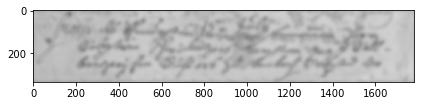

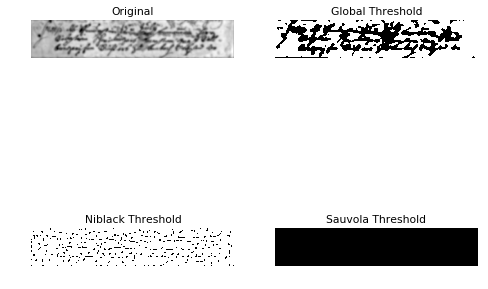

In [9]:
import skimage
from skimage import color,io,restoration
import numpy as np
import matplotlib
import matplotlib.pyplot as plt



img = io.imread(r"C:\Users\Student\Desktop\DIPCO2016_dataset\\8.bmp")
print(img.shape)
io.imshow(img)
img = color.rgb2gray(img)
from scipy.signal import convolve2d

psf = np.ones((5, 5)) / 25
img = convolve2d(img, psf, 'same')
img += 0.1 * img.std() * np.random.standard_normal(img.shape)

deconvolved_img = restoration.wiener(img, psf, 1100)
io.imshow(deconvolved_img)


from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

matplotlib.rcParams['font.size'] = 9

binary_global = deconvolved_img > threshold_otsu(deconvolved_img)

window_size = 25

thresh_niblack = threshold_niblack(deconvolved_img, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(deconvolved_img, window_size=window_size)

binary_niblack = deconvolved_img > thresh_niblack
binary_sauvola = deconvolved_img > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(deconvolved_img, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()


In [10]:
cv2.imwrite('ada.jpg',binary_global)

TypeError: img data type = 0 is not supported

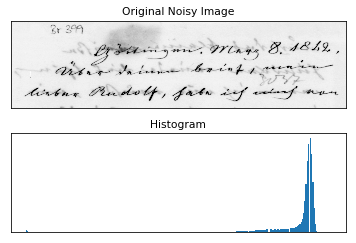

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
im = cv2.imread('4.bmp',0)

plt.subplot(2,1,1), plt.imshow(im,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2), plt.hist(im.ravel(), 256)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
 
plt.show()

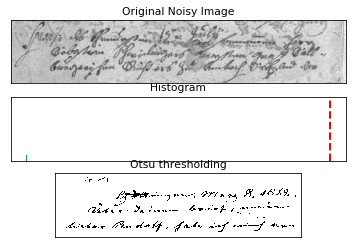

In [17]:
#blur = cv2.GaussianBlur(img, (5,5), 0)
ret, imgf = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
plt.subplot(3,1,1), plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,2), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.subplot(3,1,3), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

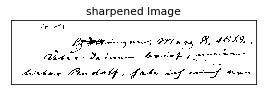

In [18]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 12,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(imgf, -1, kernel_sharpening)
plt.subplot(3,1,1), plt.imshow(sharpened,cmap = 'gray')
plt.title('sharpened Image'), plt.xticks([]), plt.yticks([])
plt.show()

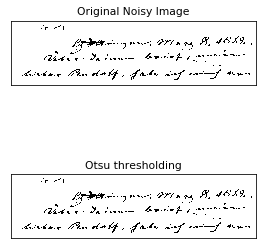

In [19]:
ret, im = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
for i in range(0,10):
    
    ret, im = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(3,1,1), plt.imshow(sharpened,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])

plt.subplot(3,1,3), plt.imshow(im,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
cv2.imwrite('8th_image.jpg',im)

True

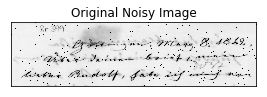

In [39]:
import numpy as np
import cv2


row,col = im.shape
p = 0.5
a = 0.009
noisy = im

  # Salt mode
num_salt = np.ceil(a * im.size * p)
coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in im.shape]
noisy[coords] = 1

  # Pepper mode
num_pepper = np.ceil(a * im.size * (1. - p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in im.shape]
noisy[coords] = 0
plt.subplot(3,1,1), plt.imshow(noisy,cmap = 'gray')
plt.title('Original Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()


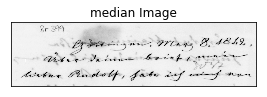

In [40]:
median_blur= cv2.medianBlur(noisy, 3)
plt.subplot(3,1,1), plt.imshow(median_blur,cmap = 'gray')
plt.title('median Image'), plt.xticks([]), plt.yticks([])
plt.show()